Judul: Memprediksi *Heating Load* serta *Cooling Load* pada Suatu Bangunan dengan Delapan Paramter Bentuk Bangunan

Kelompok 3:
1. Gemilang Bagas Ramadhani (2006535205)
2. Imam Azka Ramadhan (2006577504)
3. Muhammad Raihan Azhari (2006468320)
4. Zana Niswah Awahita (2006577593)


# Prolog

## Teori singkat mengenai *heating load* dan *cooling load*

Berdasarkan situs dari *Building Sustainability Index* (BASIX), *heating load* didefinisikan sebagai jumlah dari energi panas yang harus ditambahkan kedalam sebuah ruangan untuk menjaga temperatur udara tetap nyaman untuk manusia. Sedangkan *cooling load* didefinisikan sebagai jumlah dari energi panas yang harus diambil dari sebuah ruangan untuk menjaga temperatur udara tetap nyaman untuk manusia. kedua hal tersebut bisa disebut thermal load.

*Thermal load* yang rendah menandakan bangunan hanya memerlukan sedikit energi untuk mengembalikan suhu idealnya. beberapa bangunan bahkan dirancang untuk nyaman dihuni tanpa *air conditioner* atau *space heater*.

## Penjelasan tentang dataset

Dataset yang kami gunakan sendiri dihasilkan dari simulasi analisis energi dari 12 model dasar dari bangunan yang berbeda menggunakan Autodesk Ecotect Analysis. 12 bangunan tersebut berbeda dalam beberapa parameter, yaitu:

*   Relative compactness (X1)
*   Surface area (X2)
*   Wall area (X3)
*   Roof area (X4)
*   Overall height (X5)
*   Orientation (X6)
*   Glazing area (X7)
*   Glazing area Distribution (X8)

lalu, parameter tersebut akan menentukan nilai dari heating load (Y1) dan cooling load (Y2)

12 model dasar tersebut memiliki memiliki beberapa parameter yang statis, yaitu relative compactness, surface area, wall area dan roof area. sedangkan untuk parameter yang bervariasi adalah overall height, orientation, glazing area dan glazing area distribution. parameter yang bervariasi tadi membuat dataset memiliki 768 model bangunan yang berbeda, dengan nilai heating load dan cooling load masing-masing.

Selanjutnya, data tersebut akan dicari korelasinya untuk mendesain bangunan agar nilai cooling load dan heating load-nya optimal yang menentukan seberapa layak huni suatu bangunan.

# Dataset

In [ ]:
#meng-import data dan library yang akan dipakai

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


url = "https://raw.githubusercontent.com/gemilvng/ProyekAkhirAlinLanjut/main/energyefficiency_dataset_clean.csv"
df = pd.read_csv(url)
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [ ]:
df.head(70)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
65,0.79,637.0,343.0,147.00,7.0,3,0.1,1,37.12,35.28
66,0.79,637.0,343.0,147.00,7.0,4,0.1,1,36.90,34.43
67,0.79,637.0,343.0,147.00,7.0,5,0.1,1,35.94,43.33
68,0.76,661.5,416.5,122.50,7.0,2,0.1,1,32.96,33.87


In [ ]:
df.tail(10)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
758,0.66,759.5,318.5,220.5,3.5,4,0.4,5,14.92,17.55
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5,15.16,18.06
760,0.64,784.0,343.0,220.5,3.5,2,0.4,5,17.69,20.82
761,0.64,784.0,343.0,220.5,3.5,3,0.4,5,18.19,20.21
762,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [ ]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [ ]:
df.dtypes

relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object

In [ ]:
df.shape

(768, 10)

In [ ]:
df.describe(include = "all")

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Bagian 3


**Descriptive Statistics**

---



(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

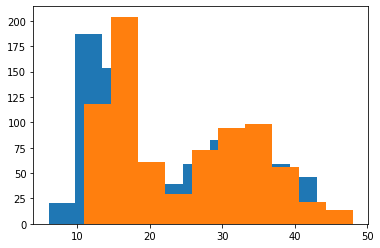

In [ ]:
plt.hist((df.heating_load))
plt.hist((df.cooling_load))

'heating_load' dan 'cooling_load' memiliki hasil yang kebanyakan bernilai di antara 10-20, memiliki skewness *positively skewed*.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccdcf94690>,
      dtype=object)

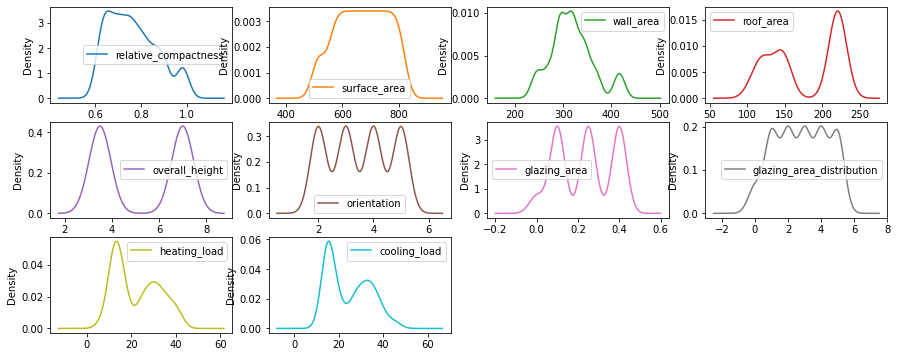

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,4), figsize=(15,6), sharex=False, sharey=False)

Kebanyakan dari feature memiliki skewness yang *positively skewed*. Kemudian 'overral_height' dan 'orientation' memiliki distribusi yang rata.

**Correlation**

---



In [ ]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.000000,-0.000000,-0.000000,0.622272,0.634339
surface_area,-0.991901,1.000000,0.195502,0.880720,-0.858148,-0.000000,0.000000,0.000000,-0.658120,-0.672999
wall_area,-0.203782,0.195502,1.000000,-0.292316,0.280976,-0.000000,-0.000000,0.000000,0.455671,0.427117
roof_area,-0.868823,0.880720,-0.292316,1.000000,-0.972512,-0.000000,-0.000000,-0.000000,-0.861828,-0.862547
overall_height,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.000000,0.000000,-0.000000,0.889431,0.895785
orientation,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.002587,0.014290
glazing_area,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.212964,0.269841,0.207505
glazing_area_distribution,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.212964,1.000000,0.087368,0.050525
heating_load,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
cooling_load,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


Dari hasil correlation diatas, 'heating_load' dan 'cooling_load' memiliki correlation yang paling tinggi dengan 'overral_height'. Sedangkan kedua output memiliki negative correlation dengan 'roof_area"

##P-Value

###Correlation Coefficient and P-Value Test for Heating Load

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['relative_compactness'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6222721790646626  with a P-value of P = 1.5912736997118763e-83


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['surface_area'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6581202267776216  with a P-value of P = 1.6869072902142385e-96


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wall_area'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4556711568983096  with a P-value of P = 1.221888688332153e-40


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['roof_area'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.8618282529058219  with a P-value of P = 4.914880966403568e-228


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['overall_height'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8894306741007043  with a P-value of P = 1.1409232650139007e-262


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['orientation'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.0025865339156387612  with a P-value of P = 0.9429492916263041


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['glazing_area'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2698409963206336  with a P-value of P = 2.795962177592611e-14


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['glazing_area_distribution'], df['heating_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.08736759370846416  with a P-value of P = 0.015440000762161364


###Correlation Coefficient and P-Value Test for Cooling Load

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['relative_compactness'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6343390663353593  with a P-value of P = 1.0608759912582303e-87


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['surface_area'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6729989333544866  with a P-value of P = 2.0052123210792597e-102


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wall_area'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4271169976671334  with a P-value of P = 2.1081966043419287e-35


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['roof_area'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.862546603524974  with a P-value of P = 7.732002122015264e-229


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['overall_height'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8957851688924499  with a P-value of P = 5.855770613018753e-272


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['orientation'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.014289597576170203  with a P-value of P = 0.6925623867163834


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['glazing_area'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.20750499116036222  with a P-value of P = 6.456865072121636e-09


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['glazing_area_distribution'], df['cooling_load'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05052511880567566  with a P-value of P = 0.16187117468126605


# Bagian 4


## Single Linear Regression (Heating Load)

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
#parameter X yang digunakan adalah parameter dengan korelasi paling besar (dilihat dari heatmap)
X = df[['overall_height']]
Y = df['heating_load']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([31.27588542, 31.27588542, 31.27588542, 31.27588542, 31.27588542])

In [ ]:
lm.intercept_

-4.598854166666666

In [ ]:
lm.coef_

array([5.1249628])

Maka, linear model-nya adalah: Heating Load = -4.59885 + (5.12496 x overall-height)



In [ ]:
#overall_height_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is (SLR): ', lm.score(X, Y))

The R-square is (SLR):  0.7910869240312334


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [31.27588542 31.27588542 31.27588542 31.27588542]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['heating_load'], Yhat)
print('The mean square error of heating load and predicted value is: ', mse)

The mean square error of heating load and predicted value is:  21.24217337612576


## Multiple Linear Regression (Heating Load)


In [ ]:
Z = df[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area', 'glazing_area_distribution']]

#parameter orientation tidak digunakan karena p-value < 0.05

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(Z, df['heating_load'])

LinearRegression()

In [ ]:
lm.intercept_

83.65239253854858

In [ ]:
lm.coef_

array([-6.46079002e+01, -2.15708194e+11,  2.15708194e+11,  4.31416388e+11,
        4.17043352e+00,  1.99319987e+01,  2.03678151e-01])

In [ ]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


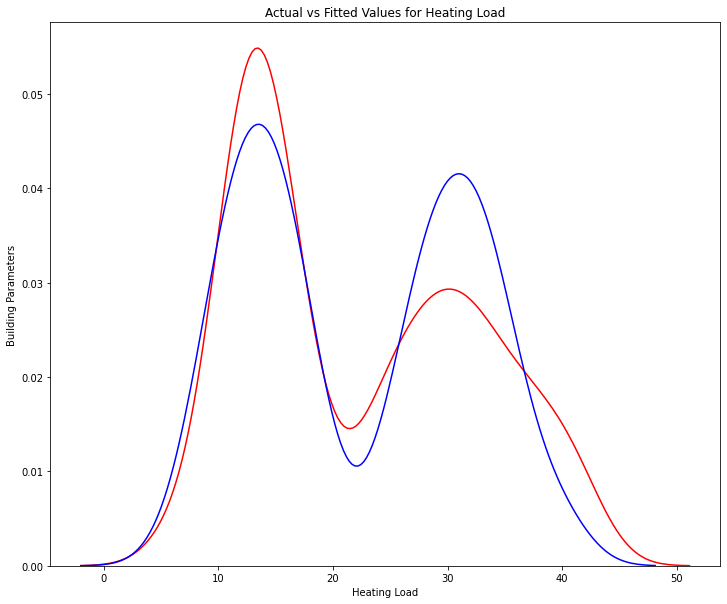

In [ ]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['heating_load'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Heating Load')
plt.xlabel('Heating Load')
plt.ylabel('Building Parameters')

plt.show()
plt.close()

In [ ]:
# fit the model 
lm.fit(Z, df['heating_load'])
# Find the R^2
print('The R-square is (MLR): ', lm.score(Z, df['heating_load']))

The R-square is (MLR):  0.9160505103234438


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of heating load and predicted value using multifit is: ', mean_squared_error(df['heating_load'], Y_predict_multifit))

The mean square error of heating load and predicted value using multifit is:  8.53594063596715


## Polynomial Regression (Heating Load)

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Heating Load')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Heating Load')

    plt.show()
    plt.close()

In [ ]:
x = df['overall_height']
y = df['heating_load']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3          2
0.02478 x + 0.1754 x + 1.159 x + 6.073


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


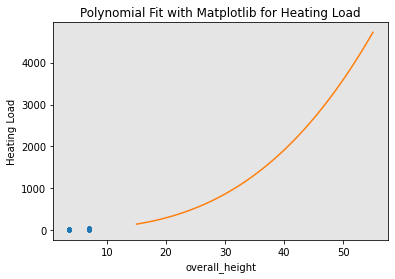

In [ ]:
PlotPolly(p, x, y, 'overall_height')

In [ ]:
np.polyfit(x, y, 3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([0.02477577, 0.17542191, 1.15851065, 6.0725489 ])

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(768, 7)

In [ ]:
Z_pr.shape

(768, 36)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is (PR): ', r_squared)

The R-square value is (PR):  0.7910869240312334


In [ ]:
mean_squared_error(df['heating_load'], p(x))

21.242173376125763

## KESIMPULAN

Untuk heating load:

1. SLR
R2 = 0.887987009965136
MSE = 26.647753462727888

2. MLR
R2 = 0.9151499310378322
MSE = 15.420471600118455

3. PR
R2 = 0.7379239852258845
MSE = 26.647753462728


Dapat disimpulkan, bahwa MLR model merupakan model terbaik untuk memprediksi heating load dari dataset kami.

## Single Linear Regression (Cooling Load)

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
#parameter X yang digunakan adalah parameter dengan korelasi paling besar (dilihat dari heatmap)
X = df[['overall_height']]
Y = df['cooling_load']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([33.10408854, 33.10408854, 33.10408854, 33.10408854, 33.10408854])

In [ ]:
lm.intercept_

-0.9612239583333242

In [ ]:
lm.coef_

array([4.86647321])

Maka, linear model-nya adalah: Cooling Load = -0.96122 + (4.86647 x overall-height)

In [ ]:
#overall_height_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is (SLR): ', lm.score(X, Y))

The R-square is (SLR):  0.8024310688076752


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [33.10408854 33.10408854 33.10408854 33.10408854]


In [ ]:
mse = mean_squared_error(df['cooling_load'], Yhat)
print('The mean square error of cooling load and predicted value is: ', mse)

The mean square error of cooling load and predicted value is:  17.85729556410048


## Multiple Linear Regression (Cooling Load)

In [ ]:
Z = df[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'glazing_area']]

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(Z, df['cooling_load'])

LinearRegression()

In [ ]:
lm.intercept_

96.95532413008695

In [ ]:
lm.coef_

array([-7.01347032e+01, -9.26113574e+11,  9.26113574e+11,  1.85222715e+12,
        4.28170204e+00,  1.47882691e+01])

In [ ]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


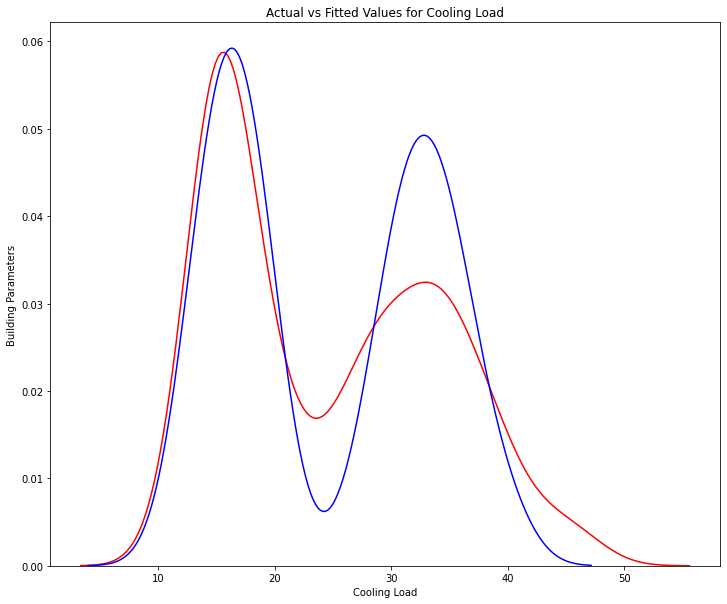

In [ ]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['cooling_load'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Building Parameters')

plt.show()
plt.close()

In [ ]:
# fit the model 
lm.fit(Z, df['cooling_load'])
# Find the R^2
print('The R-square is (MLR): ', lm.score(Z, df['cooling_load']))

The R-square is (MLR):  0.8872094863907912


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of cooling load and predicted value using multifit is: ', mean_squared_error(df['cooling_load'], Y_predict_multifit))

The mean square error of cooling load and predicted value using multifit is:  10.194586396712685


## Polynomial Regression (Cooling Load)

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Cooling Load')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Cooling Load')

    plt.show()
    plt.close()

In [ ]:
x = df['overall_height']
y = df['cooling_load']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3          2
0.02098 x + 0.1671 x + 1.313 x + 8.53


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


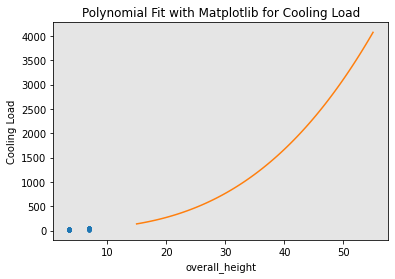

In [ ]:
PlotPolly(p, x, y, 'overall_height')

In [ ]:
np.polyfit(x, y, 3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([0.02097775, 0.16712467, 1.31282178, 8.52985763])

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(768, 6)

In [ ]:
Z_pr.shape

(768, 28)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is (PR): ', r_squared)

The R-square value is (PR):  0.8024310688076752


In [ ]:
mean_squared_error(df['cooling_load'], p(x))

17.85729556410048

## KESIMPULAN

Untuk cooling load:
1. SLR
R2 = 0.887987009965136
MSE = 17.85729556410048

2. MLR
R2 = 0.8872094863907912
MSE = 10.194586396712685

3. PR
R2 = 0.7379239852258845
MSE = 17.85729556410048


Dapat disimpulkan, bahwa MLR model merupakan model terbaik untuk memprediksi cooling load dari dataset kami.

# Bagian 5

## Function for Plotting

In [ ]:
#Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Heating Load')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

In [ ]:
#PollyPlot
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

##Heating Load

###Training and Testing

In [ ]:
##Tambahan code buat yang perlu
#Memasukan x_data dan y_data

x_data = df.drop(columns=['heating_load', 'cooling_load'])
y_data_heat = df[["heating_load"]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_heat, test_size= 0.35, random_state = 0)
print("Jumlah test sample:", x_test.shape[0])
print("Jumlah training sample:", x_train.shape[0])

Jumlah test sample: 269
Jumlah training sample: 499


Membagi data testing (35%) dan training (65%) 
Data training untuk membuat model dan membuat prediksi
Data testing dibuat untuk mengevaluasi performa

In [ ]:
#Linear Regression
#Import Linear Regression
from sklearn.linear_model import LinearRegression

#Membuat object linear regression
lre = LinearRegression()

In [ ]:
lre.fit(x_train, y_train)

LinearRegression()

Data fitting

Menghitung nilai R^2 pada test data
Nilai R2 merupakan nilai kemampuan model regresi untuk mengaproksimaasi data point

Semakin mendekati 1, maka nilai aproksimasi akan semakin akurat

Menghitung nilai R^2 pada testing data

In [ ]:
lre.score(x_test ,y_test)

0.9033093227551899

Menghitung nilai R^2 pada train data

In [ ]:
lre.score(x_train, y_train)

0.9225940963509918

Nilai R^2 pada training data lebih besar dibandingkan dengan testing data

Cross-Validation Score

Generalization Performance

Generelization error Mengukur seberapa baik data kita meprediksi unseen data

Error yang didapat menggunakan testing data merupakan aproksimasi dari error ini

Kalau misalnya data trainingnya > testing, maka model akan semakin akurat, namun kurang presisi

Kalau misalnya data testing > training maka model akan semakin presisi, namun kurang akurat

Cross validation : membagi menjadi fold

In [ ]:
from sklearn.model_selection import cross_val_score
#Cross validation score
print("Cross Validation Score")
scores = cross_val_score(lre, x_data, y_data_heat, cv = 5)
#modelnya linear regression
#banyak paritisi datanya
print(scores)

Cross Validation Score
[0.79522454 0.8979559  0.92388911 0.92483289 0.91633982]


Data dibagi manjadi 5 folds, 4 fold digunakan untuk testing dan 1 folds lainya digunakan untuk training pada masing-masing percobaan

In [ ]:
print("Average Cross Validation Scorenya nya adalah: ",np.mean(scores))

Average Cross Validation Scorenya nya adalah:  0.8916484546588602


Cross Validation Prediction

In [ ]:
print("Cross validation Prediction")
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, x_data, y_data_heat, cv = 5)
print(yhat[0:5])

Cross validation Prediction
[[25.2717099 ]
 [25.26085758]
 [25.25000526]
 [25.23915294]
 [27.4748349 ]]


Array tersebut merupakan nilai prediksi dan nilai yang terukur (nilai data sebenarnya) pada variable output (dependent variable)

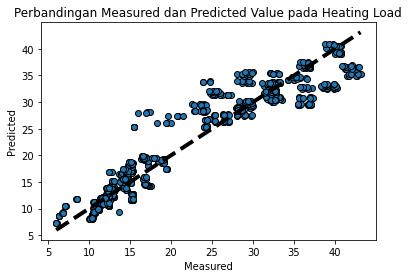

In [ ]:
import matplotlib.pyplot as plt
predicted = yhat
X = x_data
y = y_data_heat
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
plt.title("Perbandingan Measured dan Predicted Value pada Heating Load")
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

Plotting nilai predicted dan measured sesuai dengan array

Didapatkan bahwa data tidak menyebar dan berada di dekat garis linear

###Overfitting, Underfitting and Model Selection

Membuat prediction menggunakan training data

In [ ]:
lre.fit(x_train, y_train)
yhat_train = lre.predict(x_train)
yhat_train[0:5]

array([[25.43936242],
       [15.55176097],
       [15.67531818],
       [26.84219416],
       [37.45985925]])

Membuat prediction menggunakan testing data

In [ ]:
yhat_test = lre.predict(x_test)
yhat_test[0:5]

array([[17.33511088],
       [ 8.00784917],
       [29.90541555],
       [26.25186242],
       [31.12946246]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


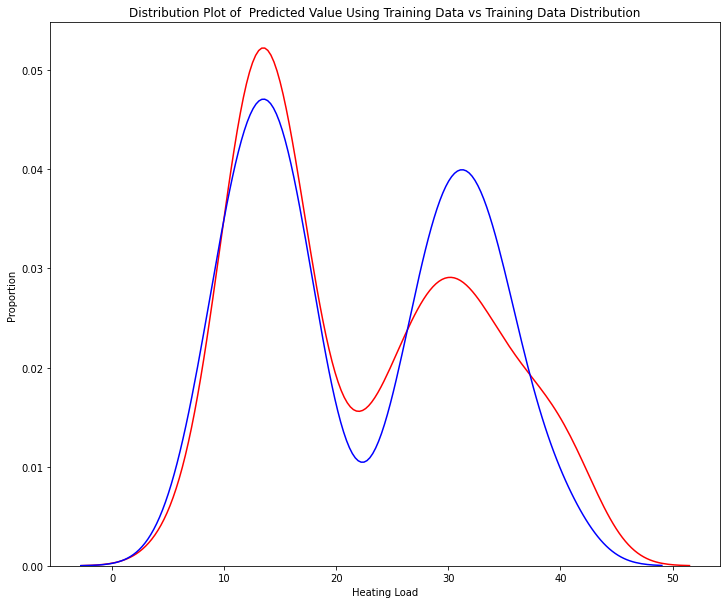

In [ ]:
%matplotlib inline
Title = 'Distribution Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)","Predicted Values (Train)", Title)

Visualisai data menggunakan grafik


*   Merah : Actual Values
*   Biru : Predicted Value



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


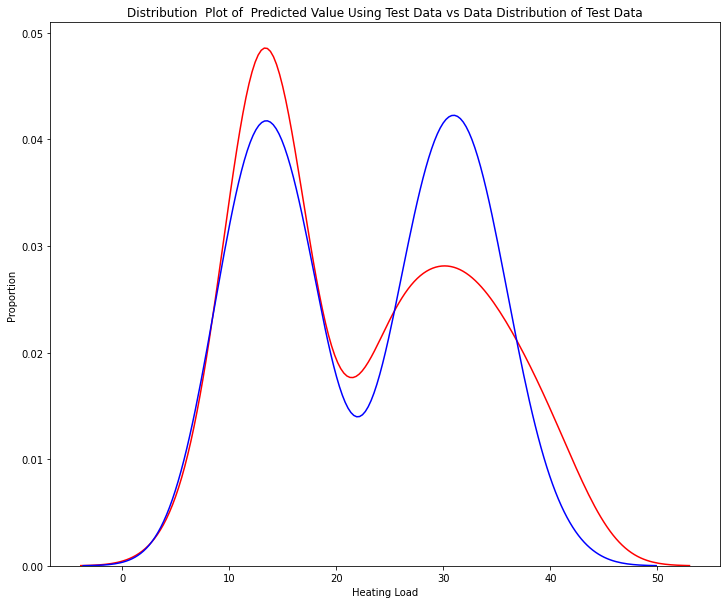

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Kedua model tersebut akurat dalam memprediksi output pada distibusi data range 0 - 20, namun kurang akurat dalam memprediksi output pada distribusi data dalam rage 20 - 55

Overfitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_heat, test_size=0.45, random_state=0)

Membagi train dan testing data dengan komposisi testing data sebesar 45%

In [ ]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Orde degree optimal yang digunakan adalah 4

In [ ]:
yhat = poly.predict(x_test_pr)

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [[15.14121463]
 [10.02967575]
 [36.87342575]
 [17.51359906]]
True values: [[15.18]
 [10.32]
 [37.26]
 [16.95]]


Didapatkan array yang berisikan predicted values yang didapatkan dari true values menggunakan perhitungan dengan fungsi poly.predict()

In [ ]:
poly.score(x_train_pr, y_train)

0.9991109299420331

Poly Score dari data training adalah 0.99 yang menandakan bahwa model linear telah mendekati kesesuaian

In [ ]:
poly.score(x_test_pr, y_test)

0.9964388686965586

Poly Score bernilai mendekati 1, yang menandakan bahwa data telah mendekati kesusaian

Text(4, 0.98, 'Maximum R^2 ')

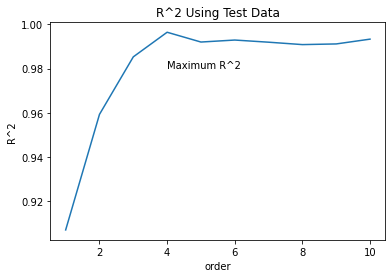

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4,  5, 6, 7, 8, 9, 10]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    lre.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(4, 0.98, 'Maximum R^2 ')  

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_heat, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train, x_test, y_train,y_test, poly, pr)

Dari diagram tersebut, dapat ditarik kesimpulan bahwa orde yang optimal unntuk digunakan adalah 3  dan 4, namun untuk menghindari terjadinya overfitting, maka nilai orde yang diambil adalah 2

###Ridge Regression

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

Menset polynomial features dengan drajat 2,serta mengambil data training dan testing dari drajat tersebut

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RigeModel=Ridge(alpha=0.5)

Menset nilai alpha dalam riidge regression dengan nilai 1



*   Semakin besar alpha, maka kemungkinan terjadi under fitting semakin besar
*   Semakin kecil alpha, maka kemungkinan terjadi over fitting semakin besar



In [ ]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.5)

In [ ]:
yhat = RigeModel.predict(x_test_pr)

In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[14.80172169]
 [10.05299077]
 [33.95355205]
 [21.5155349 ]]
test set : [[15.18]
 [10.32]
 [37.26]
 [16.95]]


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 1 * np.array(range(0,6))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 6/6 [00:00<00:00, 27.25it/s, Test Score=0.955, Train Score=0.96]


Melakukan pengujian data training dan testing pada nilai alpha 0 sampai 6, didapatkan nilai pada alpha ke-20 dengan test score 0.955 dan train score 0.96

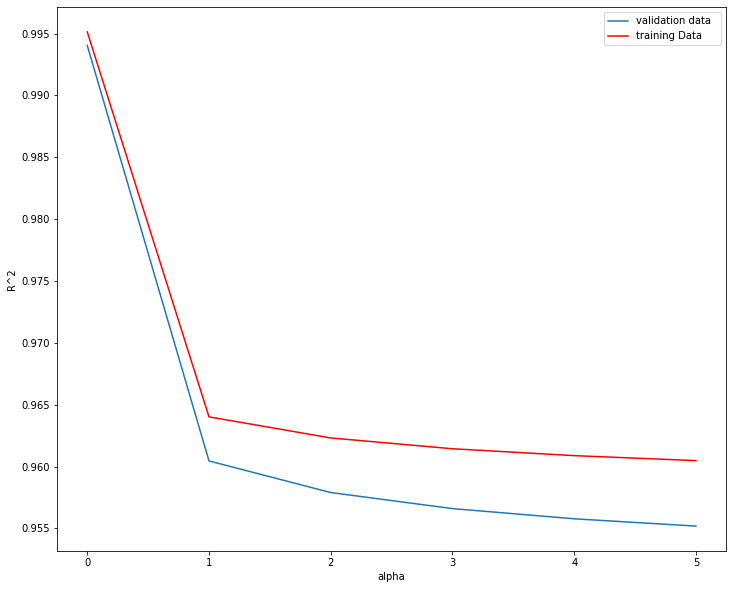

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Nilai alpha yang dapat diambil antara range 0.1, hal ini dikarenakan data R^2 antara training dan testing berhimpit dan memiliki nilai yang cukup tinggi. Apabila nilai alpha kurang dari itu, maka dikhawatirkan terjadi overfitting

###Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters1= [{'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=5)

In [ ]:
Grid1.fit(x_data, y_data_heat)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.1)

Pemilihan nilai alpha terbaik, jika menggunakan grid search adalah 0.1

In [ ]:
BestRR.score(x_test, y_test)

0.9070583112305306

Nilai alpha 0.1 yang dihasilkan dari pemilihan grid search, akan menghasilkan RR Score yang terbaik, yaitu 0.907

##Kesimpulan
- Pembagian data training dan testing dengan komposisi masing-masing 65% dan 35% menghasilkan nilai R^2 pada data testing sebesar 0.903 dan nilai R^2 pada data training sebesar 0.92. Hal ini menandakan bahwa data training dan testing sudah memiliki nilai regresi linear yang akurat.
- Pembagian data menjadi 5 folds menghasilkan cross validation dengan nilai rata-rata 0.89 dan nilai tertinggi 0.924. Hal ini menandakan bahwa cross validation prediction untuk membuatan model linear regression sudah mendekati kebenaran
- Polynomial Score bernilai 0.99 pada data training dan testing sehingga model mendekati kesesuaian
- Nilai orde terbaik untuk polynomial feature yang paling optimal (untuk terhindar dari overfitting) adalah 2 dan menghasilkan nilai R^2 sebesar 0.95
-  Dengan meggunakan orde 2, diambil nilai alpha 0.1 yang menghasilkan R^2 optimal sebesar 0.99, selain itu. Dibuktikan juga dengan menggunakan ridge search menghasilkan nilai Ridge Regression Score terbaik yaitu 0.907
- Dikarenakan data heating load dan cooling load hampir serupa, maka model prediksi ini dapat digunakan pula untuk cooling load. Hal ini dikarenakan setelah dicoba dengan metode yang sama, menghasilkan hasil dan kesimpulan yang sama pula